<a href="https://colab.research.google.com/github/bombaybrew/colab_experiments/blob/master/quickdraw_generator_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REFERENCE:

https://colab.research.google.com/github/zaidalyafeai/zaidalyafeai.github.io/blob/master/sketcher/Sketcher.ipynb
https://github.com/googlecreativelab/quickdraw-dataset

In [29]:
# !gcloud auth login
# !gcloud config set project 'upheld-quanta-284618'

In [30]:
!gsutil cp gs://ml_workspace/quick_draw/ds_20k.zip data.zip

Copying gs://ml_workspace/quick_draw/ds_20k.zip...
| [1 files][614.1 MiB/614.1 MiB]    7.4 MiB/s                                   
Operation completed over 1 objects/614.1 MiB.                                    


In [33]:
# !ls -lah
# !mkdir data
# !unzip data.zip
# !rm data.zip

In [34]:
# IMPORTS

import os
import glob
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import gc

from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [59]:
# files = glob.iglob("data/*.npy")
# file = next(files)

# data = np.load(file)
# np.random.shuffle(data)
# data = data[:10000, :]
# data.shape

# np.full(data.shape[0], 1)
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [118]:
def get_data_gen(files):

  max_items_per_class = 2000
  max_items_per_class_per_epoch = 1000
  # batch_size = max_items_per_class / max_items_per_class_per_epoch
  batch_size = 2

  # files = glob.iglob("data/*.npy")
  class_names = []

  for batch in range(batch_size):
    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    print('loading files for training')

    files = glob.iglob("data/*.npy")
    for idx, file in enumerate(files):
      print(file)
      data = np.load(file)
      data = data[0: max_items_per_class, :]
      #randomize the dataset
      np.random.shuffle(data)
      data = data[0:max_items_per_class_per_epoch, :]
      labels = np.full(data.shape[0], idx)

      x = np.concatenate((x, data), axis=0)
      y = np.append(y, labels)

      permutation = np.random.permutation(y.shape[0])
      x_train = x[permutation, :]
      x_train = x_train / 255.0
      y_train = y[permutation]

    print('---------- Loading complete')
    yield x_train, y_train

def get_data(start_index, stop_index):

  files = glob.iglob("data/*.npy")

  #initialize variables 
  x = np.empty([0, 784])
  y = np.empty([0])

  for idx, file in enumerate(files):
    print(file)
    data = np.load(file)
    data = data[start_index: stop_index, :]
    #randomize the dataset
    np.random.shuffle(data)
    labels = np.full(data.shape[0], idx)

    x = np.concatenate((x, data), axis=0)
    y = np.append(y, labels)

    permutation = np.random.permutation(y.shape[0])
    x_subset = x[permutation, :]
    x_subset = x_subset / 255.0
    y_subset = y[permutation]

    return x_subset, y_subset


In [119]:
# files = glob.iglob("data/*.npy")
# training_data_gen = get_data_gen(files)
# x_val, y_val = get_data(17000, 18000)
# x_test, y_test = get_data(18000, 20000)

data/finger.npy
data/finger.npy


In [112]:
x_train, y_train = next(training_data_gen)

loading files for training
data/finger.npy
data/ant.npy
data/bird.npy
data/peanut.npy
data/snail.npy
data/cloud.npy
data/stove.npy
data/cake.npy
data/car.npy
data/triangle.npy
data/baseball.npy
data/book.npy
data/rainbow.npy
data/rain.npy
data/eraser.npy
data/donut.npy
data/axe.npy
data/cannon.npy
data/envelope.npy
data/owl.npy
data/umbrella.npy
data/teapot.npy
data/circle.npy
data/rabbit.npy
data/fish.npy
data/hand.npy
data/door.npy
data/leg.npy
data/flower.npy
data/laptop.npy
data/truck.npy
data/fan.npy
data/table.npy
data/passport.npy
data/spider.npy
data/frog.npy
data/pizza.npy
data/kangaroo.npy
data/lion.npy
data/hammer.npy
data/cookie.npy
data/shoe.npy
data/hospital.npy
data/grapes.npy
data/bucket.npy
data/dolphin.npy
data/toothpaste.npy
data/piano.npy
data/airplane.npy
data/elephant.npy
data/nose.npy
data/panda.npy
data/drums.npy
data/cup.npy
data/onion.npy
data/microwave.npy
data/ear.npy
data/diamond.npy
data/nail.npy
data/television.npy
data/toothbrush.npy
data/beach.npy
data/

In [87]:
print(x_train.shape)
print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# print("-----------")
print(x_train[0].shape)
print(x_train.nbytes/1024/1024)

(120000, 784)
(120000,)
(784,)
717.7734375


In [ ]:
from random import randint
def visualise_random(x, y):

  idx = randint(0, len(x))
  plt.imshow(x[idx].reshape(28,28))
  print(class_names[int(y[idx])])
  print(x[idx].reshape(28,28))

spider
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  68. 172.   1.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.  38. 188.  17.   0.   0.   0.]
 [  0.   0.   0.   0. 145.  55.   0.   0.  93. 255.  38.   0.  19. 149.
  193. 107.  18.  17.   0.   0.   0.   0. 133. 248.  13.   0.   0.   0.]
 [  0.   0.   0.   0. 252. 125.   0.   0.  83. 255.  47.   0. 181. 245.
  207. 255. 255. 255. 200.  53.   0.   0. 215. 179.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 248. 129.   0.   0. 147. 240.   3.   0. 211. 196.
  173. 255. 255. 147. 224. 250.  20.  44. 255.  97.

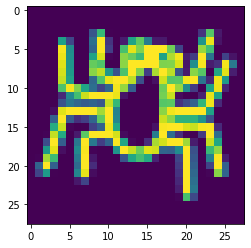

In [ ]:
visualise_random(x_train, y_train)

In [ ]:
# Pre-Processing
image_size = 28

# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float16')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float16')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, len(class_names))
y_test = keras.utils.to_categorical(y_test, len(class_names))

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("-----------")
print(x_train[0].shape)
print(x_train.nbytes/1024/1024)

(720000, 28, 28, 1)
(720000, 120)
(180000, 28, 28, 1)
(180000, 120)
-----------
(28, 28, 1)
1076.66015625


In [ ]:
# print(x_train[0])

In [ ]:
x_train.shape[1:]

(28, 28, 1)

In [ ]:
from keras.callbacks import EarlyStopping
def print_metric(model):

  score = model.evaluate(x_test, y_test, verbose=1)
  print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))
  print('----------')

  y_pred = model.predict(x_test, verbose=2)
  # y_pred = (y_pred > 0.5 ? 1 : 0)
  y_pred_argmax = np.argmax(y_pred, axis=1)
  y_test_argmax = np.argmax(y_test, axis=1)
  print(metrics.classification_report(y_test_argmax, y_pred_argmax))
  print('----------')
  print('HammingLoss: ', metrics.hamming_loss(y_test_argmax, y_pred_argmax))

def run_exp(model, epoch=20, batch_size=256):
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
  model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, epochs=epoch, verbose=1)
  print_metric(model)
  return model

In [ ]:
def get_vgg_bn_reg_seq(num_classes):

  activation = 'elu'

  model = keras.Sequential(name="vgg_bn_reg_seq")
  model.add(layers.Convolution2D(16, (3, 3), name='c2d_11', input_shape=(28, 28, 1), padding='same', activation=activation))
  model.add(layers.Convolution2D(16, (3, 3), name='c2d_12', padding='same', activation=activation))
  model.add(layers.Convolution2D(16, (3, 3), name='c2d_13', padding='same', activation=activation))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.BatchNormalization())
  model.add(layers.Convolution2D(32, (3, 3), name='c2d_21', padding='same', activation=activation))
  model.add(layers.Convolution2D(32, (3, 3), name='c2d_22', padding='same', activation=activation))
  model.add(layers.Convolution2D(32, (3, 3), name='c2d_23', padding='same', activation=activation))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.BatchNormalization())
  model.add(layers.Convolution2D(64, (3, 3), name='c2d_31', padding='same', activation=activation))
  model.add(layers.Convolution2D(64, (3, 3), name='c2d_32', padding='same', activation=activation))
  model.add(layers.Convolution2D(64, (3, 3), name='c2d_33', padding='same', activation=activation))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(256, name='d1', activation=activation))
  model.add(layers.Dense(256, name='d2', activation=activation))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(num_classes, name='softmax', activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  print(model.summary())
  return model

model = run_exp(get_vgg_bn_reg_seq(120))

Model: "vgg_bn_reg_seq"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c2d_11 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
c2d_12 (Conv2D)              (None, 28, 28, 16)        2320      
_________________________________________________________________
c2d_13 (Conv2D)              (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
c2d_21 (Conv2D)              (None, 14, 14, 32)     

In [ ]:
# import tensorflowjs as tfjs
# name = 'qd_vgg_81.h5'
# model.save(name)
# tfjs.converters.save_keras_model(model, 'qd_vgg_81_tfjs')

# !gsutil cp -r qd_vgg_81_tfjs gs://ml_workspace/quick_draw/model
# !gsutil cp qd_vgg_81.h5 gs://ml_workspace/quick_draw/model/qd_vgg_81.h5



In [ ]:
# classes = ','.join(class_names)
# text_file = open("classes.txt", "w")
# n = text_file.write(classes)
# text_file.close()
# !more classes.txt

# !gsutil cp classes.txt gs://ml_workspace/quick_draw/model/qd_vgg_81_tfjs/classes.txt